In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import re

intl_mat = pd.read_csv('results.csv')
teams_18 = pd.read_csv('fixtures_russia_2018.csv')
teams_18 = list(teams_18['HomeTeam'].unique())
teams_18 = teams_18[:32]
relevant_years = [1974,1978,1982,1986,1990,1994,1998,2002,2006,2010,2014]
#,1982,1986,1990,

In [2]:
wc = pd.read_csv('WorldCupMatches.csv')
wc = wc[wc['Year']>=1974]

In [3]:
wc_teams_74 = set(list(wc[wc['Year']==1974]['Home Team Name'])+list(wc[wc['Year']==1974]['Away Team Name']))
wc_teams_78 = set(list(wc[wc['Year']==1978]['Home Team Name'])+list(wc[wc['Year']==1978]['Away Team Name']))
wc_teams_82 = set(list(wc[wc['Year']==1982]['Home Team Name'])+list(wc[wc['Year']==1982]['Away Team Name']))
wc_teams_86 = set(list(wc[wc['Year']==1986]['Home Team Name'])+list(wc[wc['Year']==1986]['Away Team Name']))
wc_teams_90 = set(list(wc[wc['Year']==1990]['Home Team Name'])+list(wc[wc['Year']==1990]['Away Team Name']))
wc_teams_94 = set(list(wc[wc['Year']==1994]['Home Team Name'])+list(wc[wc['Year']==1994]['Away Team Name']))
wc_teams_98 = set(list(wc[wc['Year']==1998]['Home Team Name'])+list(wc[wc['Year']==1998]['Away Team Name']))
wc_teams_02 = list(wc[wc['Year']==2002]['Home Team Name'].unique())
wc_teams_06 = list(wc[wc['Year']==2006]['Home Team Name'].unique())
wc_teams_10 = list(wc[wc['Year']==2010]['Home Team Name'].unique())
wc_teams_14 = list(wc[wc['Year']==2014]['Home Team Name'].unique())
wc_teams_74 = [s.replace('Germany FR','Germany').replace('Soviet Union','Russia').replace('IR Iran','Iran').replace("C�te d'Ivoire",'Ivory Coast').replace('rn">Bosnia and Herzegovina', 'Bosnia-Herzegovina').replace('rn">Serbia and Montenegro','Serbia').replace('rn">Trinidad and Tobago','Trinidad and Tobago').replace('rn">Republic of Ireland','Ireland').replace('China PR','China').replace('Yugoslavia','Serbia').replace('German DR','Germany') for s in wc_teams_74]
wc_teams_78 = [s.replace('Germany FR','Germany').replace('IR Iran','Iran').replace("C�te d'Ivoire",'Ivory Coast').replace('rn">Bosnia and Herzegovina', 'Bosnia-Herzegovina').replace('rn">Serbia and Montenegro','Serbia').replace('rn">Trinidad and Tobago','Trinidad and Tobago').replace('rn">Republic of Ireland','Ireland').replace('China PR','China').replace('Yugoslavia','Serbia').replace('German DR','Germany').replace('Soviet Union','Russia') for s in wc_teams_78]
wc_teams_82 = [s.replace('IR Iran','Iran').replace('Germany FR','Germany').replace("C�te d'Ivoire",'Ivory Coast').replace('rn">Bosnia and Herzegovina', 'Bosnia-Herzegovina').replace('rn">Serbia and Montenegro','Serbia').replace('rn">Trinidad and Tobago','Trinidad and Tobago').replace('rn">Republic of Ireland','Ireland').replace('China PR','China').replace('Yugoslavia','Serbia').replace('German DR','Germany').replace('Soviet Union','Russia') for s in wc_teams_82]
wc_teams_86 = [s.replace('IR Iran','Iran').replace('Germany FR','Germany').replace("C�te d'Ivoire",'Ivory Coast').replace('rn">Bosnia and Herzegovina', 'Bosnia-Herzegovina').replace('rn">Serbia and Montenegro','Serbia').replace('rn">Trinidad and Tobago','Trinidad and Tobago').replace('rn">Republic of Ireland','Ireland').replace('China PR','China').replace('Yugoslavia','Serbia').replace('German DR','Germany').replace('Soviet Union','Russia') for s in wc_teams_86]
wc_teams_90 = [s.replace('IR Iran','Iran').replace("C�te d'Ivoire",'Ivory Coast').replace('Germany FR','Germany').replace('rn">Bosnia and Herzegovina', 'Bosnia-Herzegovina').replace('rn">Serbia and Montenegro','Serbia').replace('rn">Trinidad and Tobago','Trinidad and Tobago').replace('rn">Republic of Ireland','Ireland').replace('China PR','China').replace('Yugoslavia','Serbia').replace('German DR','Germany').replace('Soviet Union','Russia').replace('rn">United Arab Emirates','United Arab Emirates') for s in wc_teams_90]
wc_teams_94 = [s.replace('IR Iran','Iran').replace("C�te d'Ivoire",'Ivory Coast').replace('rn">Bosnia and Herzegovina', 'Bosnia-Herzegovina').replace('Germany FR','Germany').replace('rn">Serbia and Montenegro','Serbia').replace('rn">Trinidad and Tobago','Trinidad and Tobago').replace('rn">Republic of Ireland','Ireland').replace('China PR','China').replace('Yugoslavia','Serbia').replace('German DR','Germany').replace('Soviet Union','Russia').replace('rn">United Arab Emirates','United Arab Emirates') for s in wc_teams_94]
wc_teams_98 = [s.replace('IR Iran','Iran').replace("C�te d'Ivoire",'Ivory Coast').replace('rn">Bosnia and Herzegovina', 'Bosnia-Herzegovina').replace('rn">Serbia and Montenegro','Serbia').replace('Germany FR','Germany').replace('rn">Trinidad and Tobago','Trinidad and Tobago').replace('rn">Republic of Ireland','Ireland').replace('China PR','China').replace('Yugoslavia','Serbia').replace('German DR','Germany').replace('Soviet Union','Russia') for s in wc_teams_98]
wc_teams_02 = [s.replace('IR Iran','Iran').replace("C�te d'Ivoire",'Ivory Coast').replace('rn">Bosnia and Herzegovina', 'Bosnia-Herzegovina').replace('rn">Serbia and Montenegro','Serbia').replace('rn">Trinidad and Tobago','Trinidad and Tobago').replace('Germany FR','Germany').replace('rn">Republic of Ireland','Ireland').replace('China PR','China').replace('Yugoslavia','Serbia').replace('German DR','Germany') for s in wc_teams_02]
wc_teams_06 = [s.replace('IR Iran','Iran').replace("C�te d'Ivoire",'Ivory Coast').replace('rn">Bosnia and Herzegovina', 'Bosnia-Herzegovina').replace('rn">Serbia and Montenegro','Serbia').replace('rn">Trinidad and Tobago','Trinidad and Tobago').replace('rn">Republic of Ireland','Ireland').replace('Germany FR','Germany').replace('China PR','China').replace('Yugoslavia','Serbia').replace('German DR','Germany') for s in wc_teams_06]
wc_teams_10 = [s.replace('IR Iran','Iran').replace("C�te d'Ivoire",'Ivory Coast').replace('rn">Bosnia and Herzegovina', 'Bosnia-Herzegovina').replace('rn">Serbia and Montenegro','Serbia').replace('rn">Trinidad and Tobago','Trinidad and Tobago').replace('rn">Republic of Ireland','Ireland').replace('China PR','China').replace('Yugoslavia','Serbia').replace('Germany FR','Germany').replace('German DR','Germany') for s in wc_teams_10]
wc_teams_14 = [s.replace('IR Iran','Iran').replace("C�te d'Ivoire",'Ivory Coast').replace('rn">Bosnia and Herzegovina', 'Bosnia-Herzegovina').replace('rn">Serbia and Montenegro','Serbia').replace('rn">Trinidad and Tobago','Trinidad and Tobago').replace('rn">Republic of Ireland','Ireland').replace('China PR','China').replace('Yugoslavia','Serbia').replace('German DR','Germany').replace('Germany FR','Germany') for s in wc_teams_14]
def home_away(row,team):
    if row['home_team'] == team:
        return 'H'
    elif row['away_team'] == team:
        return 'A'
def opponent(row,team,teams):
    if row['home_team'] == team:
        return 'y' if row['away_team'] in teams else 'n'
    else:
        return 'y' if row['home_team'] in teams else 'n'
def win_lose(row):
    if row['H_A'] == 'H':
        return 'W' if int(row['home_score'])>int(row['away_score']) else 'L'
    else:
        return 'W' if int(row['home_score'])<int(row['away_score']) else 'L'

def agg(row):
    if row['H_A'] == 'H':
        return int(row['home_score'])-int(row['away_score'])
    else:
        return int(row['away_score'])-int(row['home_score'])
def goals_for(row):
    if row['H_A'] == 'H':
        return int(row['home_score'])
    else:
        return int(row['away_score']) 
def goals_against(row):
    if row['H_A'] == 'H':
        return int(row['away_score'])
    else:
        return int(row['home_score'])
def all_teams(teams,wc_teams):
    if all(elem in teams for elem in wc_teams):
        return 'True'

In [7]:
matches74 = intl_mat[(intl_mat['date']>'1970-06-21')&(intl_mat['date']<'1974-06-13')].reset_index(drop = True)
teams74 = list(dict(matches74['home_team'].value_counts()).keys())
matches78 = intl_mat[(intl_mat['date']>'1974-07-07')&(intl_mat['date']<'1978-06-01')].reset_index(drop = True)
teams78 = list(dict(matches78['home_team'].value_counts()).keys())
matches82 = intl_mat[(intl_mat['date']>'1978-06-25')&(intl_mat['date']<'1982-06-13')].reset_index(drop = True)
teams82 = list(dict(matches82['home_team'].value_counts()).keys())
matches86 = intl_mat[(intl_mat['date']>'1982-07-11')&(intl_mat['date']<'1986-05-31')].reset_index(drop = True)
teams86 = list(dict(matches86['home_team'].value_counts()).keys())
matches90 = intl_mat[(intl_mat['date']>'1986-06-29')&(intl_mat['date']<'1990-06-08')].reset_index(drop = True)
teams90 = list(dict(matches90['home_team'].value_counts()).keys())
matches94 = intl_mat[(intl_mat['date']>'1990-07-08')&(intl_mat['date']<'1994-06-17')].reset_index(drop = True)
teams94 = list(dict(matches94['home_team'].value_counts()).keys())
matches98 = intl_mat[(intl_mat['date']>'1994-07-17')&(intl_mat['date']<'1998-06-10')].reset_index(drop = True)
teams98 = list(dict(matches98['home_team'].value_counts()).keys())
matches02 = intl_mat[(intl_mat['date']>'1998-07-12')&(intl_mat['date']<'2002-05-31')].reset_index(drop = True)
teams02 = list(dict(matches02['home_team'].value_counts()).keys())
matches06 = intl_mat[(intl_mat['date']>'2002-06-30')&(intl_mat['date']<'2006-06-09')].reset_index(drop = True)
teams06 = list(matches06['home_team'].unique())
matches10 = intl_mat[(intl_mat['date']>'2006-07-09')&(intl_mat['date']<'2010-06-11')].reset_index(drop = True)
teams10 = list(dict(matches10['home_team'].value_counts()).keys())
matches14 = intl_mat[(intl_mat['date']>'2010-07-11')&(intl_mat['date']<'2014-06-12')].reset_index(drop = True)
teams14 = list(dict(matches14['home_team'].value_counts()).keys())

wc_matches74 = intl_mat[(intl_mat['date']<='1974-07-07')&(intl_mat['date']>='1974-06-13')&(intl_mat['tournament']=='FIFA World Cup')].reset_index(drop = True)
wc_matches78 = intl_mat[(intl_mat['date']<='1978-06-25')&(intl_mat['date']>='1978-06-01')&(intl_mat['tournament']=='FIFA World Cup')].reset_index(drop = True)
wc_matches82 = intl_mat[(intl_mat['date']<='1982-07-11')&(intl_mat['date']>='1982-06-13')&(intl_mat['tournament']=='FIFA World Cup')].reset_index(drop = True)
wc_matches86 = intl_mat[(intl_mat['date']<='1986-06-29')&(intl_mat['date']>='1986-05-31')&(intl_mat['tournament']=='FIFA World Cup')].reset_index(drop = True)
wc_matches90 = intl_mat[(intl_mat['date']<='1990-07-08')&(intl_mat['date']>='1990-06-08')&(intl_mat['tournament']=='FIFA World Cup')].reset_index(drop = True)
wc_matches94 = intl_mat[(intl_mat['date']<='1994-07-17')&(intl_mat['date']>='1994-06-17')&(intl_mat['tournament']=='FIFA World Cup')].reset_index(drop = True)
wc_matches98 = intl_mat[(intl_mat['date']<='1998-07-12')&(intl_mat['date']>='1998-06-10')&(intl_mat['tournament']=='FIFA World Cup')].reset_index(drop = True)
wc_matches02 = intl_mat[(intl_mat['date']<='2002-06-30')&(intl_mat['date']>='2002-05-31')&(intl_mat['tournament']=='FIFA World Cup')].reset_index(drop = True)
wc_matches06 = intl_mat[(intl_mat['date']<='2006-07-09')&(intl_mat['date']>='2006-06-09')&(intl_mat['tournament']=='FIFA World Cup')].reset_index(drop = True)
wc_matches10 = intl_mat[(intl_mat['date']<='2010-07-11')&(intl_mat['date']>='2010-06-11')&(intl_mat['tournament']=='FIFA World Cup')].reset_index(drop = True)
wc_matches14 = intl_mat[(intl_mat['date']<='2014-07-13')&(intl_mat['date']>='2014-06-12')&(intl_mat['tournament']=='FIFA World Cup')].reset_index(drop = True)


wc_matches74['home_team'] = wc_matches74['home_team'].str.replace('German DR','Germany')
wc_matches74['away_team'] = wc_matches74['away_team'].str.replace('German DR','Germany')

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
232,1974.0,13 Jun 1974 - 17:00,Group 2,Waldstadion,Frankfurt/Main,Brazil,0.0,0.0,Yugoslavia,,62000.0,0.0,0.0,SCHEURER Ruedi (SUI),LORAUX Vital (BEL),PESTARINO Luis (ARG),262.0,1986.0,BRA,YUG
233,1974.0,14 Jun 1974 - 16:00,Group 1,Olympiastadion,Berlin West,Germany FR,1.0,0.0,Chile,,81100.0,1.0,0.0,BABACAN Dogan (TUR),TAYLOR John (ENG),WINSEMANN Werner (CAN),262.0,2003.0,FRG,CHI
234,1974.0,14 Jun 1974 - 19:30,Group 1,Volksparkstadion,Hamburg,German DR,2.0,0.0,Australia,,17000.0,0.0,0.0,NDIAYE Youssou (SEN),SANCHEZ IBANEZ Pablo (ESP),DELGADO Omar (COL),262.0,1955.0,GDR,AUS
235,1974.0,14 Jun 1974 - 19:30,Group 2,Westfalenstadion,Dortmund,Zaire,0.0,2.0,Scotland,,27000.0,0.0,2.0,SCHULENBURG Gerhard (GER),BOSKOVIC Tony (AUS),WEYLAND Hans Joachim (FRG),262.0,2176.0,ZAI,SCO
236,1974.0,15 Jun 1974 - 16:00,Group 3,Niedersachsenstadion,Hanover,Uruguay,0.0,2.0,Netherlands,,55100.0,0.0,1.0,PALOTAI Karoly (HUN),KAZAKOV Pavel (URS),RAINEA Nicolae (ROU),262.0,2098.0,URU,NED
237,1974.0,15 Jun 1974 - 16:00,Group 3,Rheinstadion,D�Sseldorf,Sweden,0.0,0.0,Bulgaria,,23800.0,0.0,0.0,PEREZ NUNEZ Edison A. (PER),GONZALEZ ARCHUNDIA Alfonso (MEX),SUPPIAH George (SIN),262.0,1995.0,SWE,BUL
238,1974.0,15 Jun 1974 - 18:00,Group 4,Olympiastadion,Munich,Italy,3.0,1.0,Haiti,,53000.0,0.0,0.0,LLOBREGAT Vicente (VEN),NAMDAR Jafar (IRN),MARQUES Armando (BRA),262.0,2083.0,ITA,HAI
239,1974.0,15 Jun 1974 - 18:00,Group 4,Neckarstadion,Stuttgart,Poland,3.0,2.0,Argentina,,32700.0,2.0,0.0,THOMAS Clive (WAL),ALDINGER Heinz (GER),DAVIDSON Bob (SCO),262.0,1952.0,POL,ARG
240,1974.0,18 Jun 1974 - 16:00,Group 1,Volksparkstadion,Hamburg,Australia,0.0,3.0,Germany FR,,53300.0,0.0,2.0,KAMEL Mahmoud (EGY),GONZALEZ ARCHUNDIA Alfonso (MEX),PEREZ NUNEZ Edison A. (PER),262.0,1954.0,AUS,FRG
241,1974.0,18 Jun 1974 - 19:30,Group 2,Waldstadion,Frankfurt/Main,Scotland,0.0,0.0,Brazil,,62000.0,0.0,0.0,VAN GEMERT Arie (NED),PALOTAI Karoly (HUN),LINEMAYR Erich (AUT),262.0,1985.0,SCO,BRA


In [8]:
teams_18 = pd.read_csv('fixtures_russia_2018.csv')
teams_18 = list(teams_18['HomeTeam'].unique())
teams_18 = teams_18[:32]
teams_18[17] = 'Iran'

In [9]:
rank = pd.read_csv('fifa_ranking.csv')
rank = rank[['country_full','confederation']]
rank.reset_index(inplace=True)
dic = rank.set_index('country_full').to_dict()
federation = dic['confederation']
#federation =  list(dic['confederation'].items())
federation

federation['Ireland'] = federation.pop('Republic of Ireland')
federation['Iran'] = federation.pop('IR Iran')
federation['Ivory Coast'] = federation.pop("Côte d'Ivoire")
federation['Bosnia-Herzegovina'] = federation.pop('Bosnia and Herzegovina')
federation['Serbia'] = federation.pop('Serbia and Montenegro')
federation['Trinidad and Tobago'] = federation.pop('Trinidad and Tobago')
federation['China'] = federation.pop('China PR')
federation['Serbia'] = federation.pop('Yugoslavia')

In [10]:
def grouping(wc_teams,matches,year,confed):
    dic = {}
    count=0
    for elem in wc_teams:
        if elem not in ['Zaire','Haiti','Kuwait','Czechoslovakia']:
            '''if (year == 1974) or (year==1982)or (year==1990):
                if elem!= 'Serbia':
                    print(elem)
                    count+=1
                    country = pd.merge(matches[matches['away_team']==elem],matches[matches['home_team']==elem],how='outer').sort_values('date').reset_index(drop=True)
                    country['H_A'] = country.apply(lambda x: home_away(x,elem),axis=1)
                    country['opponent'] = country.apply(lambda x: opponent(x,elem,wc_teams),axis=1)
                    country['result'] = country.apply(lambda x: win_lose(x),axis=1)
                    country['score'] = country.apply(lambda x: agg(x),axis=1)
                    country['gF'] = country.apply(lambda x: goals_for(x),axis=1)
                    country['gA'] = country.apply(lambda x: goals_against(x),axis=1)
                    try:
                        wrat_fr = country[country['tournament']=='Friendly']['result'].value_counts()['W']/country[country['tournament']=='Friendly'].shape[0]
                    except:
                        wrat_fr=0
                    try:
                        wrat_other = country[~country['tournament'].isin(['Friendly','FIFA World Cup qualification'])]['result'].value_counts()['W']/country[~country['tournament'].isin(['Friendly','FIFA World Cup qualification'])].shape[0]
                    except:
                        wrat_other = 0
                    agg_score_fr = country[country['tournament']=='Friendly']['score'].sum(axis=0)
                    agg_score_other = country[~country['tournament'].isin(['Friendly','FIFA World Cup qualification'])]['score'].sum(axis=0)
                    try:
                        gF_wc =country[country['tournament']=='FIFA World Cup qualification']['gF'].sum(axis=0)/country[country['tournament']=='FIFA World Cup qualification'].shape[0]
                    except:
                        gF_wc = 0
                    try:
                        gA_wc =country[country['tournament']=='FIFA World Cup qualification']['gA'].sum(axis=0)/country[country['tournament']=='FIFA World Cup qualification'].shape[0]
                    except:
                        gA_wc = 0
                    try:
                        wrat_wc = country[country['tournament']=='FIFA World Cup qualification']['result'].value_counts()['W']/country[country['tournament']=='FIFA World Cup qualification'].shape[0]
                    except:
                        wrat_wc = 0
                    try:
                        form = country.tail()['result'].value_counts()['W']
                    except:
                        form = 0
                    try:
                        agg_score_wc = country[country['tournament']=='FIFA World Cup qualification']['score'].sum(axis=0)
                    except:
                        agg_score_wc = 0
                    gF_fr =country[country['tournament']=='Friendly']['gF'].sum(axis=0)/country[country['tournament']=='Friendly'].shape[0]
                    gA_fr =country[country['tournament']=='Friendly']['gA'].sum(axis=0)/country[country['tournament']=='Friendly'].shape[0]
                    try:
                        gF_other =country[~country['tournament'].isin(['Friendly','FIFA World Cup qualification'])]['gF'].sum(axis=0)/country[~country['tournament'].isin(['Friendly','FIFA World Cup qualification'])].shape[0]
                        gA_other =country[~country['tournament'].isin(['Friendly','FIFA World Cup qualification'])]['gA'].sum(axis=0)/country[~country['tournament'].isin(['Friendly','FIFA World Cup qualification'])].shape[0]
                    except:
                        gF_other = 0
                        gA_other = 0
                    country = country.drop(['home_team','away_team','home_score','away_score','city','country','neutral'],axis=1)
                    dic['%s - %s'%(elem,year)] = [wrat_fr,wrat_other,wrat_wc,gA_fr,gA_other,gA_wc,gF_fr,gF_other,gF_wc,agg_score_fr,agg_score_other,agg_score_wc,form,confed[elem]]'''
        #    else:
            if (((year==1974) & (elem=='Serbia')) or((year==1990) & (elem=='Serbia')) or ((year==1982) & (elem=='Serbia')) or ((year==1986) & (elem=='Serbia'))):
                dic['%s - %s'%(elem,year)] = [0,0,0,0,0,0,0,0,0,0,0,0,0,confed[elem]]
            else:
                print(elem)
                count+=1
                country = pd.merge(matches[matches['away_team']==elem],matches[matches['home_team']==elem],how='outer').sort_values('date').reset_index(drop=True)
                country['H_A'] = country.apply(lambda x: home_away(x,elem),axis=1)
                country['opponent'] = country.apply(lambda x: opponent(x,elem,wc_teams),axis=1)
                country['result'] = country.apply(lambda x: win_lose(x),axis=1)
                country['score'] = country.apply(lambda x: agg(x),axis=1)
                country['gF'] = country.apply(lambda x: goals_for(x),axis=1)
                country['gA'] = country.apply(lambda x: goals_against(x),axis=1)
                try:
                    wrat_fr = country[country['tournament']=='Friendly']['result'].value_counts()['W']/country[country['tournament']=='Friendly'].shape[0]
                except:
                    wrat_fr=0
                try:
                    wrat_other = country[~country['tournament'].isin(['Friendly','FIFA World Cup qualification'])]['result'].value_counts()['W']/country[~country['tournament'].isin(['Friendly','FIFA World Cup qualification'])].shape[0]
                except:
                    wrat_other = 0
                agg_score_fr = country[country['tournament']=='Friendly']['score'].sum(axis=0)
                agg_score_other = country[~country['tournament'].isin(['Friendly','FIFA World Cup qualification'])]['score'].sum(axis=0)
                try:
                    gF_wc =country[country['tournament']=='FIFA World Cup qualification']['gF'].sum(axis=0)/country[country['tournament']=='FIFA World Cup qualification'].shape[0]
                except:
                    gF_wc = 0
                try: 
                    gA_wc =country[country['tournament']=='FIFA World Cup qualification']['gA'].sum(axis=0)/country[country['tournament']=='FIFA World Cup qualification'].shape[0]
                except:
                    gA_wc = 0
                try:
                    wrat_wc = country[country['tournament']=='FIFA World Cup qualification']['result'].value_counts()['W']/country[country['tournament']=='FIFA World Cup qualification'].shape[0]
                except:
                    wrat_wc = 0            
                try:
                    form = country.tail()['result'].value_counts()['W']
                except:
                    form = 0
                try:
                    agg_score_wc = country[country['tournament']=='FIFA World Cup qualification']['score'].sum(axis=0)
                except:
                    agg_score_wc = 0

                gF_fr =country[country['tournament']=='Friendly']['gF'].sum(axis=0)/country[country['tournament']=='Friendly'].shape[0]
                gA_fr =country[country['tournament']=='Friendly']['gA'].sum(axis=0)/country[country['tournament']=='Friendly'].shape[0]
                try:
                    gF_other =country[~country['tournament'].isin(['Friendly','FIFA World Cup qualification'])]['gF'].sum(axis=0)/country[~country['tournament'].isin(['Friendly','FIFA World Cup qualification'])].shape[0]
                    gA_other =country[~country['tournament'].isin(['Friendly','FIFA World Cup qualification'])]['gA'].sum(axis=0)/country[~country['tournament'].isin(['Friendly','FIFA World Cup qualification'])].shape[0]
                except:
                    gF_other = 0
                    gA_other = 0
                country = country.drop(['home_team','away_team','home_score','away_score','city','country','neutral'],axis=1)
                dic['%s - %s'%(elem,year)] = [wrat_fr,wrat_other,wrat_wc,gA_fr,gA_other,gA_wc,gF_fr,gF_other,gF_wc,agg_score_fr,agg_score_other,agg_score_wc,form,confed[elem]]
    return dic

In [ ]:
#series_82 = grouping(wc_teams_82,matches82,1982,federation)
#matches82

In [11]:
matches18 = intl_mat[(intl_mat['date']>'2014-07-13')].reset_index(drop = True)
wc_matches_18 = pd.read_csv('fixtures_russia_2018.csv')
wc_teams_18 = list(wc_matches_18['HomeTeam'].unique())
wc_teams_18 = wc_teams_18[:32]
wc_teams_18[17] = 'Iran'
series_18 = grouping(wc_teams_18,matches18,2018,federation)

Russia
Egypt
Morocco
Portugal
France
Argentina
Peru
Croatia
Costa Rica
Germany
Brazil
Sweden
Belgium
Tunisia
Colombia
Poland
Uruguay
Iran
Denmark
Nigeria
Serbia
Korea Republic
England
Japan
Saudi Arabia
Spain
Australia
Iceland
Mexico
Switzerland
Senegal
Panama


In [12]:
wc_matches_18['HomeTeam'] = wc_matches_18['HomeTeam'].str.replace('IR Iran','Iran')
wc_matches_18['AwayTeam'] = wc_matches_18['AwayTeam'].str.replace('IR Iran','Iran')

wc_matches_18.head()

,Tournament,Game,DateTime,Group/Stage,Stadium,City,HomeTeam,AwayTeam
0,Russia 2018,1,14 Jun 2018 - 18:00,Group A,Luzhniki Stadium,Moscow,Russia,Saudi Arabia
1,Russia 2018,2,15 Jun 2018 - 17:00,Group A,Ekaterinburg Arena,Ekaterinburg,Egypt,Uruguay
2,Russia 2018,3,15 Jun 2018 - 18:00,Group B,Saint Petersburg Stadium,St. Petersburg,Morocco,Iran
3,Russia 2018,4,15 Jun 2018 - 21:00,Group B,Fisht Stadium,Sochi,Portugal,Spain
4,Russia 2018,5,16 Jun 2018 - 13:00,Group C,Kazan Arena,Kazan,France,Australia


In [13]:
series_74 = grouping(wc_teams_74,matches74,1974,federation)
series_78 = grouping(wc_teams_78,matches78,1978,federation)
series_82 = grouping(wc_teams_82,matches82,1982,federation)
series_86 = grouping(wc_teams_86,matches86,1986,federation)
series_90 = grouping(wc_teams_90,matches90,1990,federation)
series_94 = grouping(wc_teams_94,matches94,1994,federation)
series_98 = grouping(wc_teams_98,matches98,1998,federation)
series_02 = grouping(wc_teams_02,matches02,2002,federation)
series_06 = grouping(wc_teams_06,matches06,2006,federation)
series_10 = grouping(wc_teams_10,matches10,2010,federation)
series_14 = grouping(wc_teams_14,matches14,2014,federation)

Brazil
Scotland
Chile
Sweden
Uruguay
Italy
Germany
Netherlands
Germany
Bulgaria
Poland
Australia
Argentina
Brazil
Scotland
Sweden
Austria
Spain
Iran
Italy
Hungary
Mexico
Peru
France
Netherlands
Germany
Poland
Iran
Tunisia
Argentina
Scotland
England
Cameroon
Peru
Russia
Belgium
Argentina
Brazil
Chile
El Salvador
Austria
France
Germany
Poland
Algeria
Spain
Honduras
Italy
Hungary
New Zealand
Northern Ireland
Scotland
England
Paraguay
Russia
Belgium
Iraq
Argentina
Portugal
Mexico
Morocco
Brazil
Denmark
Korea Republic
France
Germany
Bulgaria
Poland
Algeria
Canada
Spain
Uruguay
Italy
Hungary
Northern Ireland
Scotland
England
United Arab Emirates
Cameroon
Russia
Belgium
Argentina
Ireland
Sweden
Brazil
Austria
Korea Republic
Egypt
Colombia
Romania
Netherlands
Germany
Costa Rica
Spain
Uruguay
Italy
USA
Switzerland
Saudi Arabia
Cameroon
Belgium
Argentina
Greece
Ireland
Mexico
Germany
Morocco
Sweden
Bolivia
Brazil
Nigeria
Korea Republic
Colombia
Romania
Netherlands
Bulgaria
Norway
Spain
Italy
Rus

In [ ]:
#wc_matches14[(wc_matches14['home_team']=='Brazil')|(wc_matches14['away_team']=='Brazil')]

In [14]:
def team_1(row,year):
    return ('%s - %s'%(row['home_team'],year))
def team_2(row,year):
    return ('%s - %s'%(row['away_team'],year))


In [15]:
braz14 = wc_matches14
braz10 = wc_matches10
braz06 = wc_matches06
braz02 = wc_matches02
braz98 = wc_matches98
braz94 = wc_matches94
braz90 = wc_matches90
braz86 = wc_matches86
braz82 = wc_matches82
braz78 = wc_matches78
braz74 = wc_matches74
#braz14.tail()

In [ ]:
#wc_matches90

In [16]:
def team_1_18(row,year):
    return ('%s - %s'%(row['HomeTeam'],year))
def team_2_18(row,year):
    return ('%s - %s'%(row['AwayTeam'],year))
braz18 = wc_matches_18
braz18['HomeTeam'] = braz18.apply(lambda x:team_1_18(x,2018),axis=1)
braz18['AwayTeam'] = braz18.apply(lambda x:team_2_18(x,2018),axis=1)
braz18 = braz18.rename(columns={'HomeTeam':'team_1','AwayTeam':'team_2'}).drop(['Stadium','DateTime','Tournament','Game','Group/Stage','City','Tournament'],axis=1).reset_index(drop=True)



In [17]:
def pull_1(row,dic):
    return dic[row['team_1']][0],dic[row['team_1']][1],dic[row['team_1']][2],dic[row['team_1']][3],dic[row['team_1']][4],dic[row['team_1']][5],dic[row['team_1']][6],dic[row['team_1']][7],dic[row['team_1']][8],dic[row['team_1']][9],dic[row['team_1']][10],dic[row['team_1']][11],dic[row['team_1']][12],dic[row['team_1']][13]
def pull_2(row,dic):
    return dic[row['team_2']][0],dic[row['team_2']][1],dic[row['team_2']][2],dic[row['team_2']][3],dic[row['team_2']][4],dic[row['team_2']][5],dic[row['team_2']][6],dic[row['team_2']][7],dic[row['team_2']][8],dic[row['team_2']][9],dic[row['team_2']][10],dic[row['team_2']][11],dic[row['team_2']][12],dic[row['team_2']][13]

braz18 = braz18.iloc[:48]
braz18_2  = braz18.copy()
braz18_2 = braz18_2.rename(columns={'team_1':'team_2','team_2':'team_1','score_1':'score_2','score_2':'score_1'})
braz18_2 = braz18_2[['team_1','team_2']]
braz18 = pd.concat([braz18,braz18_2]).reset_index(drop=True)

braz18['Frie_winrat_1'],braz18['other_winrat_1'],braz18['Wcup_winrat_1'],braz18['goals_ag_fr_1'],braz18['goals_ag_other_1'],braz18['goals_ag_wcup_1'],braz18['goals_for_friend_1'],braz18['goals_for_other_1'],braz18['goals_for_wcup_1'],braz18['agg_score_friend_1'], braz18['agg_score_other_1'],braz18['agg_score_wcup_1'],braz18['opp_form_1'],braz18['opp_feder_1']=zip(*braz18.apply(lambda x:pull_1(x,series_18),axis=1))
braz18['Frie_winrat_2'],braz18['other_winrat_2'],braz18['Wcup_winrat_2'],braz18['goals_ag_fr_2'],braz18['goals_ag_other_2'],braz18['goals_ag_wcup_2'],braz18['goals_for_friend_2'],braz18['goals_for_other_2'],braz18['goals_for_wcup_2'],braz18['agg_score_friend_2'], braz18['agg_score_other_2'],braz18['agg_score_wcup_2'],braz18['opp_form_2'],braz18['opp_feder_2']=zip(*braz18.apply(lambda x:pull_2(x,series_18),axis=1))
games_18_list = braz18['team_1']
braz18.head()

,team_1,team_2,Frie_winrat_1,other_winrat_1,Wcup_winrat_1,goals_ag_fr_1,goals_ag_other_1,goals_ag_wcup_1,goals_for_friend_1,goals_for_other_1,...,goals_ag_other_2,goals_ag_wcup_2,goals_for_friend_2,goals_for_other_2,goals_for_wcup_2,agg_score_friend_2,agg_score_other_2,agg_score_wcup_2,opp_form_2,opp_feder_2
0,Russia - 2018,Saudi Arabia - 2018,0.333333,0.437500,0.000,1.481481,0.875000,0.000,1.555556,1.625000,...,1.250000,0.777778,1.520000,1.750000,2.500000,-4,4,31,2,AFC
1,Egypt - 2018,Uruguay - 2018,0.555556,0.529412,0.625,0.611111,0.647059,0.625,1.166667,1.294118,...,1.000000,1.111111,1.733333,0.857143,1.666667,12,-1,10,3,CONMEBOL
2,Morocco - 2018,Iran - 2018,0.652174,0.588235,0.500,0.565217,0.588235,0.125,1.869565,1.588235,...,0.750000,0.277778,1.952381,1.750000,2.000000,27,4,31,3,AFC
3,Portugal - 2018,Spain - 2018,0.500000,0.650000,0.900,0.863636,0.650000,0.400,1.772727,1.450000,...,0.500000,0.300000,1.900000,2.000000,3.600000,18,21,33,1,UEFA
4,France - 2018,Australia - 2018,0.656250,0.714286,0.700,1.062500,0.714286,0.600,2.031250,1.857143,...,0.888889,0.818182,1.066667,2.000000,2.318182,-6,10,33,3,AFC


In [ ]:
#matches98[(matches98['home_team']=='Norway')|(matches98['away_team']=='Norway')].head()

In [18]:

#[(wc_matches14['home_team']=='Brazil')|(wc_matches14['away_team']=='Brazil')]
braz14['home_team'] = braz14.apply(lambda x:team_1(x,2014),axis=1)
braz14['away_team'] = braz14.apply(lambda x:team_2(x,2014),axis=1)
braz10['home_team'] = braz10.apply(lambda x:team_1(x,2010),axis=1)
braz10['away_team'] = braz10.apply(lambda x:team_2(x,2010),axis=1)
braz06['home_team'] = braz06.apply(lambda x:team_1(x,2006),axis=1)
braz06['away_team'] = braz06.apply(lambda x:team_2(x,2006),axis=1)
braz02['home_team'] = braz02.apply(lambda x:team_1(x,2002),axis=1)
braz02['away_team'] = braz02.apply(lambda x:team_2(x,2002),axis=1)
braz98['home_team'] = braz98.apply(lambda x:team_1(x,1998),axis=1)
braz98['away_team'] = braz98.apply(lambda x:team_2(x,1998),axis=1)
braz94['home_team'] = braz94.apply(lambda x:team_1(x,1994),axis=1)
braz94['away_team'] = braz94.apply(lambda x:team_2(x,1994),axis=1)
braz90['home_team'] = braz90.apply(lambda x:team_1(x,1990),axis=1)
braz90['away_team'] = braz90.apply(lambda x:team_2(x,1990),axis=1)
braz86['home_team'] = braz86.apply(lambda x:team_1(x,1986),axis=1)
braz86['away_team'] = braz86.apply(lambda x:team_2(x,1986),axis=1)
braz82['home_team'] = braz82.apply(lambda x:team_1(x,1982),axis=1)
braz82['away_team'] = braz82.apply(lambda x:team_2(x,1982),axis=1)
braz78['home_team'] = braz78.apply(lambda x:team_1(x,1978),axis=1)
braz78['away_team'] = braz78.apply(lambda x:team_2(x,1978),axis=1)
braz74['home_team'] = braz74.apply(lambda x:team_1(x,1974),axis=1)
braz74['away_team'] = braz74.apply(lambda x:team_2(x,1974),axis=1)

In [19]:
br = pd.concat([braz14,braz10,braz06,braz02,braz98,braz94,braz90,braz86,braz82,braz78,braz74])
#,braz86,braz82,braz78,braz74
br = br.rename(columns={'home_team':'team_1','away_team':'team_2','home_score':'score_1','away_score':'score_2'}).drop(['city','country','neutral','tournament'],axis=1).reset_index(drop=True)
br
#braz90

,date,team_1,team_2,score_1,score_2
0,2014-06-12,Brazil - 2014,Croatia - 2014,3,1
1,2014-06-13,Chile - 2014,Australia - 2014,3,1
2,2014-06-13,Mexico - 2014,Cameroon - 2014,1,0
3,2014-06-13,Spain - 2014,Netherlands - 2014,1,5
4,2014-06-14,Colombia - 2014,Greece - 2014,3,0
5,2014-06-14,England - 2014,Italy - 2014,1,2
6,2014-06-14,Ivory Coast - 2014,Japan - 2014,2,1
7,2014-06-14,Uruguay - 2014,Costa Rica - 2014,1,3
8,2014-06-15,Argentina - 2014,Bosnia-Herzegovina - 2014,2,1
9,2014-06-15,France - 2014,Honduras - 2014,3,0


In [20]:
br2  = br.copy()
br2 = br2.rename(columns={'team_1':'team_2','team_2':'team_1','score_1':'score_2','score_2':'score_1'})
br2 = br2[['date','team_1','team_2','score_1','score_2']]
br = pd.concat([br,br2]).reset_index(drop=True)

In [ ]:
#len(series_90)

In [21]:

def pull_1(row,choices):
    t = str(row['team_1']).split()[-1][-2:]
    dic = choices[t]
    return dic[row['team_1']][0],dic[row['team_1']][1],dic[row['team_1']][2],dic[row['team_1']][3],dic[row['team_1']][4],dic[row['team_1']][5],dic[row['team_1']][6],dic[row['team_1']][7],dic[row['team_1']][8],dic[row['team_1']][9],dic[row['team_1']][10],dic[row['team_1']][11],dic[row['team_1']][12],dic[row['team_1']][13]
def pull_2(row,choices):
    t = str(row['team_2']).split()[-1][-2:]
    dic = choices[t]
    return dic[row['team_2']][0],dic[row['team_2']][1],dic[row['team_2']][2],dic[row['team_2']][3],dic[row['team_2']][4],dic[row['team_2']][5],dic[row['team_2']][6],dic[row['team_2']][7],dic[row['team_2']][8],dic[row['team_2']][9],dic[row['team_2']][10],dic[row['team_2']][11],dic[row['team_2']][12],dic[row['team_2']][13]

In [22]:
serie = {'14':series_14,'10':series_10,'06':series_06,'02':series_02,'98':series_98,'94':series_94,'90':series_90,'86':series_86,'82':series_82,'78':series_78,'74':series_74}
#,'86':series_86,'82':series_82,
#'90':series_90,

In [ ]:
list(pd.concat([br[br['team_1']=='Yugoslavia - 1990'],br[br['team_2']=='Yugoslavia - 1990']]).index)

In [ ]:
series_74

In [27]:
br = br.drop(br.index[list(pd.concat([br[br['team_1']=='Haiti - 1974'],br[br['team_2']=='Haiti - 1974']]).index)]).reset_index(drop=True)
br = br.drop(br.index[list(pd.concat([br[br['team_1']=='Congo DR - 1974'],br[br['team_2']=='Congo DR - 1974']]).index)]).reset_index(drop=True)
br = br.drop(br.index[list(pd.concat([br[br['team_1']=='Yugoslavia - 1974'],br[br['team_2']=='Yugoslavia - 1974']]).index)]).reset_index(drop=True)
br = br.drop(br.index[list(pd.concat([br[br['team_1']=='Yugoslavia - 1990'],br[br['team_2']=='Yugoslavia - 1990']]).index)]).reset_index(drop=True)
br = br.drop(br.index[list(pd.concat([br[br['team_1']=='Yugoslavia - 1982'],br[br['team_2']=='Yugoslavia - 1982']]).index)]).reset_index(drop=True)
br = br.drop(br.index[list(pd.concat([br[br['team_1']=='Kuwait - 1982'],br[br['team_2']=='Kuwait - 1982']]).index)]).reset_index(drop=True)
br = br.drop(br.index[list(pd.concat([br[br['team_1']=='Czechoslovakia - 1990'],br[br['team_2']=='Czechoslovakia - 1990']]).index)]).reset_index(drop=True)
br = br.drop(br.index[list(pd.concat([br[br['team_1']=='Czechoslovakia - 1982'],br[br['team_2']=='Czechoslovakia - 1982']]).index)]).reset_index(drop=True)

In [28]:
br['Frie_winrat_1'],br['other_winrat_1'],br['Wcup_winrat_1'],br['goals_ag_fr_1'],br['goals_ag_other_1'],br['goals_ag_wcup_1'],br['goals_for_friend_1'],br['goals_for_other_1'],br['goals_for_wcup_1'],br['agg_score_friend_1'], br['agg_score_other_1'],br['agg_score_wcup_1'],br['opp_form_1'],br['opp_feder_1']=zip(*br.apply(lambda x:pull_1(x,serie),axis=1))

In [29]:
br['Frie_winrat_2'],br['other_winrat_2'],br['Wcup_winrat_2'],br['goals_ag_fr_2'],br['goals_ag_other_2'],br['goals_ag_wcup_2'],br['goals_for_friend_2'],br['goals_for_other_2'],br['goals_for_wcup_2'],br['agg_score_friend_2'], br['agg_score_other_2'],br['agg_score_wcup_2'],br['opp_form_2'],br['opp_feder_2']=zip(*br.apply(lambda x:pull_2(x,serie),axis=1))

In [30]:
def rescore(row):
    if row['score_1'] >= 3:
        return 3
    else:
        return row['score_1']

In [31]:
br['goals'] = br.apply(lambda x: rescore(x),axis=1)
br.head()

,date,team_1,team_2,score_1,score_2,Frie_winrat_1,other_winrat_1,Wcup_winrat_1,goals_ag_fr_1,goals_ag_other_1,...,goals_ag_wcup_2,goals_for_friend_2,goals_for_other_2,goals_for_wcup_2,agg_score_friend_2,agg_score_other_2,agg_score_wcup_2,opp_form_2,opp_feder_2,goals
0,2014-06-12,Brazil - 2014,Croatia - 2014,3,1,0.673913,0.666667,0.000000,0.673913,0.777778,...,0.750000,1.750000,1.666667,1.166667,8,15,5,3,UEFA,3
1,2014-06-13,Chile - 2014,Australia - 2014,3,1,0.400000,0.666667,0.562500,1.120000,0.833333,...,0.857143,1.347826,2.846154,1.785714,-4,27,13,2,AFC,3
2,2014-06-13,Mexico - 2014,Cameroon - 2014,1,0,0.483871,0.588235,0.529412,0.838710,1.058824,...,0.500000,1.052632,1.666667,1.500000,0,15,8,2,CAF,1
3,2014-06-13,Spain - 2014,Netherlands - 2014,1,5,0.703704,0.789474,0.750000,0.925926,0.578947,...,0.500000,1.434783,3.000000,3.400000,12,26,29,2,UEFA,1
4,2014-06-14,Colombia - 2014,Greece - 2014,3,0,0.500000,0.500000,0.562500,0.454545,0.500000,...,0.500000,0.947368,1.357143,1.333333,5,7,10,1,UEFA,3


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

In [55]:
scaler = StandardScaler()
br[['agg_score_friend_1','agg_score_other_1','agg_score_wcup_1','opp_form_1','agg_score_friend_2','agg_score_other_2','agg_score_wcup_2','opp_form_2']] = scaler.fit_transform(br[['agg_score_friend_1','agg_score_other_1','agg_score_wcup_1','opp_form_1','agg_score_friend_2','agg_score_other_2','agg_score_wcup_2','opp_form_2']])
br['opp_feder_2'] = pd.Categorical(br['opp_feder_2'])
br['opp_feder_1'] = pd.Categorical(br['opp_feder_1'])
br['opp_feder_2'] = br['opp_feder_2'].cat.codes
br['opp_feder_1'] = br['opp_feder_1'].cat.codes
br['team_1'] = pd.Categorical(br['team_1'])
br['team_2'] = pd.Categorical(br['team_2'])
br['team_1'] = br['team_1'].cat.codes
br['team_2'] = br['team_2'].cat.codes
br[['team_1','team_2']] = scaler.fit_transform(br[['team_1','team_2']])

br.iloc[0]
X = br.drop(['score_1','score_2','date','goals','team_1','team_2'],axis=1)
#
y = br['goals']
X

,Frie_winrat_1,other_winrat_1,Wcup_winrat_1,goals_ag_fr_1,goals_ag_other_1,goals_ag_wcup_1,goals_for_friend_1,goals_for_other_1,goals_for_wcup_1,agg_score_friend_1,...,goals_ag_other_2,goals_ag_wcup_2,goals_for_friend_2,goals_for_other_2,goals_for_wcup_2,agg_score_friend_2,agg_score_other_2,agg_score_wcup_2,opp_form_2,opp_feder_2
0,0.673913,0.666667,0.000000,0.673913,0.777778,0.000000,2.282609,2.222222,0.000000,4.438742,...,0.666667,0.750000,1.750000,1.666667,1.166667,-0.238028,0.387956,-0.823353,0.463181,5
1,0.400000,0.666667,0.562500,1.120000,0.833333,1.562500,1.600000,1.833333,1.812500,0.045412,...,0.769231,0.857143,1.347826,2.846154,1.785714,-1.088350,1.497550,0.136947,-0.318989,0
2,0.483871,0.588235,0.529412,0.838710,1.058824,0.764706,1.451613,2.000000,1.529412,0.541433,...,0.833333,0.500000,1.052632,1.666667,1.500000,-0.804910,0.387956,-0.463240,-0.318989,1
3,0.703704,0.789474,0.750000,0.925926,0.578947,0.375000,2.148148,2.789474,1.750000,1.533475,...,1.000000,0.500000,1.434783,3.000000,3.400000,0.045412,1.405084,2.057548,-0.318989,5
4,0.500000,0.500000,0.562500,0.454545,0.500000,0.812500,1.272727,0.750000,1.687500,0.470573,...,0.857143,0.500000,0.947368,1.357143,1.333333,-0.450609,-0.351774,-0.223165,-1.101160,5
5,0.523810,0.583333,0.600000,1.142857,0.666667,0.400000,1.428571,1.833333,3.100000,-0.379749,...,0.904762,0.900000,1.090909,1.714286,1.900000,-1.017490,0.572888,-0.223165,-1.883330,5
6,0.470588,0.800000,0.625000,1.294118,0.750000,0.875000,1.588235,2.250000,2.375000,-0.450609,...,1.500000,0.571429,1.769231,1.857143,2.142857,0.470573,-0.536706,1.217285,2.027521,0
7,0.526316,0.454545,0.444444,1.105263,0.909091,1.388889,1.842105,2.090909,1.666667,0.187132,...,0.850000,0.750000,0.870968,1.250000,1.687500,-1.726092,-0.259307,0.377022,-1.883330,2
8,0.612903,0.250000,0.562500,0.935484,0.500000,0.937500,1.870968,1.250000,2.187500,1.250035,...,1.166667,0.600000,1.250000,1.583333,3.000000,-0.875770,-0.536706,1.457360,0.463181,5
9,0.560000,0.500000,0.600000,0.680000,0.642857,0.800000,1.840000,1.285714,1.800000,1.250035,...,0.888889,0.937500,0.961538,1.333333,1.562500,-2.009532,-0.259307,-0.223165,-1.883330,2


In [ ]:
X.iloc[0]

In [56]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=9)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
print(np.mean(pred != y_test))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.678260869565
             precision    recall  f1-score   support

          0       0.36      0.42      0.38       144
          1       0.32      0.47      0.38       164
          2       0.11      0.03      0.05        90
          3       0.33      0.13      0.19        62

avg / total       0.29      0.32      0.29       460

[[60 73  8  3]
 [66 77 13  8]
 [29 53  3  5]
 [13 37  4  8]]


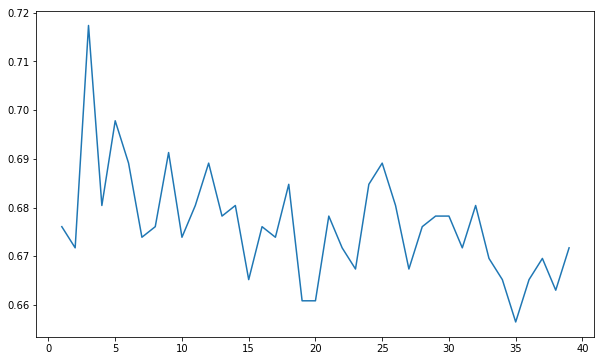

In [58]:
error_rate = []

for i in range(1,40):
    tot = []
    for j in range(1,30):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(Xknn_train,yknn_train)
        predknn_i = knn.predict(Xknn_test)
        tot.append(np.mean(predknn_i != yknn_test))
    error_rate.append(np.average(tot))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate)

In [46]:
err = []
for i in range(1,50):
    Xknn_train,Xknn_test,yknn_train,yknn_test = train_test_split(X,y,test_size=0.4,random_state=i)
    knn = KNeighborsClassifier(n_neighbors=35)
    knn.fit(Xknn_train,yknn_train)
    predknn = knn.predict(Xknn_test)
    err.append(np.mean(predknn != yknn_test))
print(np.average(err))
print(classification_report(yknn_test,predknn))
print(confusion_matrix(yknn_test,predknn))

0.652129547471
             precision    recall  f1-score   support

          0       0.36      0.44      0.40       144
          1       0.31      0.49      0.38       153
          2       0.17      0.04      0.07       100
          3       0.41      0.11      0.18        63

avg / total       0.31      0.33      0.29       460

[[64 71  4  5]
 [65 75 11  2]
 [36 57  4  3]
 [13 39  4  7]]


In [62]:
param_grid = {'C':[0.1,.5,.7,1,1.3,1.5,2],'gamma':[1,0.5,0.1,0.05,0.01]}
grid = GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(X_train_svm,y_train_svm)
print(grid.best_params_)
print(grid.best_estimator_)
grid_pred = grid.predict(X_test_svm)

print(confusion_matrix(y_test_svm,grid_pred))
print(classification_report(y_test_svm,grid_pred))

Fitting 3 folds for each of 35 candidates, totalling 105 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.353896 -   0.2s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ......................... C=0.1, gamma=1, score=0.352941 -   0.1s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] ......................... C=0.1, gamma=1, score=0.352941 -   0.1s
[CV] C=0.1, gamma=0.5 ................................................
[CV] ....................... C=0.1, gamma=0.5, score=0.353896 -   0.1s
[CV] C=0.1, gamma=0.5 ................................................
[CV] ....................... C=0.1, gamma=0.5, score=0.352941 -   0.1s
[CV] C=0.1, gamma=0.5 ................................................
[CV] ....................... C=0.1, gamma=0.5, score=0.352941 -   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.353896 -   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.352941 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.352941 -   0.1s
[CV] C=0.1, gamma=0.05 ...............................................
[CV] .

[CV] ......................... C=1.3, gamma=1, score=0.363636 -   0.1s
[CV] C=1.3, gamma=1 ..................................................
[CV] ......................... C=1.3, gamma=1, score=0.339869 -   0.1s
[CV] C=1.3, gamma=1 ..................................................
[CV] ......................... C=1.3, gamma=1, score=0.356209 -   0.1s
[CV] C=1.3, gamma=0.5 ................................................
[CV] ....................... C=1.3, gamma=0.5, score=0.350649 -   0.2s
[CV] C=1.3, gamma=0.5 ................................................
[CV] ....................... C=1.3, gamma=0.5, score=0.330065 -   0.1s
[CV] C=1.3, gamma=0.5 ................................................
[CV] ....................... C=1.3, gamma=0.5, score=0.343137 -   0.1s
[CV] C=1.3, gamma=0.1 ................................................
[CV] ....................... C=1.3, gamma=0.1, score=0.370130 -   0.1s
[CV] C=1.3, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:   20.3s finished


{'C': 1.5, 'gamma': 0.05}
SVC(C=1.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
[[34 34  0  1]
 [35 42  2  1]
 [17 27  4  3]
 [ 6 23  1  0]]
             precision    recall  f1-score   support

          0       0.37      0.49      0.42        69
          1       0.33      0.53      0.41        80
          2       0.57      0.08      0.14        51
          3       0.00      0.00      0.00        30

avg / total       0.35      0.35      0.30       230



In [63]:
err = []
for i in range(1,100):
    X_train_svm,X_test_svm,y_train_svm,y_test_svm = train_test_split(X,y,test_size=0.2,random_state=i)
    model_svc = SVC(C= 1.5, gamma= .05)
    model_svc.fit(X_train_svm,y_train_svm)
    pred_svm = model_svc.predict(X_test_svm)
    err.append(np.mean(predknn != yknn_test))
print(np.average(err))
print(confusion_matrix(y_test_svm,pred_svm))
print(classification_report(y_test_svm,pred_svm))

0.673913043478
[[34 34  0  1]
 [35 42  2  1]
 [17 27  4  3]
 [ 6 23  1  0]]
             precision    recall  f1-score   support

          0       0.37      0.49      0.42        69
          1       0.33      0.53      0.41        80
          2       0.57      0.08      0.14        51
          3       0.00      0.00      0.00        30

avg / total       0.35      0.35      0.30       230



In [41]:
from sklearn.svm import SVR

In [64]:
param_grid = {'C':[0.1,0.5,1,1.5,2],'gamma':[0.1,.05,0.01,0.005]}
grid = GridSearchCV(SVR(),param_grid,verbose=3)
grid.fit(X_train_svm,y_train_svm)
print(grid.best_params_)
print(grid.best_estimator_)
grid_pred = grid.predict(X_test_svm)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.024592 -   0.2s
[CV] C=0.1, gamma=0.1 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ....................... C=0.1, gamma=0.1, score=0.046776 -   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.045437 -   0.1s
[CV] C=0.1, gamma=0.05 ...............................................
[CV] ...................... C=0.1, gamma=0.05, score=0.040027 -   0.1s
[CV] C=0.1, gamma=0.05 ...............................................
[CV] ...................... C=0.1, gamma=0.05, score=0.057865 -   0.0s
[CV] C=0.1, gamma=0.05 ...............................................
[CV] ...................... C=0.1, gamma=0.05, score=0.064877 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.014285 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.048019 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    9.6s finished


{'C': 1, 'gamma': 0.01}
SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [65]:
err_svr=[]
for i in range(1,200):
    X_train_svm,X_test_svm,y_train_svm,y_test_svm = train_test_split(X,y,test_size=0.2,random_state=i)
    model_svr = SVR(C= 1, gamma= .01)
    model_svr.fit(X_train_svm,y_train_svm)
    pred_svr = model_svr.predict(X_test_svm)
    err_svr.append(np.mean(np.round(pred_svr,0) != y_test_svm))
print(np.average(err_svr))


0.643653047848


In [ ]:
##so use this so we need to bring in 2018 matches and predict

In [66]:
braz18_fin = braz18
scaler = StandardScaler()
braz18_fin[['agg_score_friend_1','agg_score_other_1','agg_score_wcup_1','opp_form_1','agg_score_friend_2','agg_score_other_2','agg_score_wcup_2','opp_form_2']] = scaler.fit_transform(braz18_fin[['agg_score_friend_1','agg_score_other_1','agg_score_wcup_1','opp_form_1','agg_score_friend_2','agg_score_other_2','agg_score_wcup_2','opp_form_2']])
braz18_fin['opp_feder_2'] = pd.Categorical(braz18_fin['opp_feder_2'])
braz18_fin['opp_feder_1'] = pd.Categorical(braz18_fin['opp_feder_1'])
braz18_fin['opp_feder_2'] = braz18_fin['opp_feder_2'].cat.codes
braz18_fin['opp_feder_1'] = braz18_fin['opp_feder_1'].cat.codes
braz18_fin['team_1'] = pd.Categorical(braz18_fin['team_1'])
braz18_fin['team_2'] = pd.Categorical(braz18_fin['team_2'])
braz18_fin['team_1'] = braz18_fin['team_1'].cat.codes
braz18_fin['team_2'] = braz18_fin['team_2'].cat.codes
braz18_fin = braz18_fin.drop(['team_1','team_2'],axis=1)
braz18_fin.iloc[0]

Frie_winrat_1         3.333333e-01
other_winrat_1        4.375000e-01
Wcup_winrat_1         0.000000e+00
goals_ag_fr_1         1.481481e+00
goals_ag_other_1      8.750000e-01
goals_ag_wcup_1       0.000000e+00
goals_for_friend_1    1.555556e+00
goals_for_other_1     1.625000e+00
goals_for_wcup_1      0.000000e+00
agg_score_friend_1   -8.397431e-01
agg_score_other_1     4.918491e-02
agg_score_wcup_1     -1.461719e+00
opp_form_1           -1.745743e+00
opp_feder_1           4.000000e+00
Frie_winrat_2         3.600000e-01
other_winrat_2        5.000000e-01
Wcup_winrat_2         6.666667e-01
goals_ag_fr_2         1.680000e+00
goals_ag_other_2      1.250000e+00
goals_ag_wcup_2       7.777778e-01
goals_for_friend_2    1.520000e+00
goals_for_other_2     1.750000e+00
goals_for_wcup_2      2.500000e+00
agg_score_friend_2   -1.443603e+00
agg_score_other_2    -8.501964e-01
agg_score_wcup_2      1.218550e+00
opp_form_2            4.625929e-18
opp_feder_2           0.000000e+00
Name: 0, dtype: floa

In [ ]:
#braz18_fin = braz18_fin.drop(['team_1','team_2'],axis=1)

In [67]:
#use this ********************************
model_svc = SVC(C= 1.5, gamma= .05)
model_svc.fit(X,y)
pred_18_svc = model_svc.predict(braz18_fin)
for i in range(48):
    print(games_18_list[i],pred_18_svc[i],games_18_list[48+i],pred_18_svc[48+i])

Russia - 2018 2 Saudi Arabia - 2018 0
Egypt - 2018 0 Uruguay - 2018 1
Morocco - 2018 3 Iran - 2018 1
Portugal - 2018 1 Spain - 2018 1
France - 2018 3 Australia - 2018 0
Argentina - 2018 1 Iceland - 2018 0
Peru - 2018 1 Denmark - 2018 0
Croatia - 2018 1 Nigeria - 2018 0
Costa Rica - 2018 1 Serbia - 2018 1
Germany - 2018 1 Mexico - 2018 0
Brazil - 2018 1 Switzerland - 2018 0
Sweden - 2018 1 Korea Republic - 2018 1
Belgium - 2018 1 Panama - 2018 0
Tunisia - 2018 1 England - 2018 1
Colombia - 2018 1 Japan - 2018 0
Poland - 2018 1 Senegal - 2018 1
Russia - 2018 0 Egypt - 2018 0
Portugal - 2018 1 Morocco - 2018 1
Uruguay - 2018 1 Saudi Arabia - 2018 1
Iran - 2018 0 Spain - 2018 2
Denmark - 2018 1 Australia - 2018 1
France - 2018 1 Peru - 2018 1
Argentina - 2018 1 Croatia - 2018 1
Brazil - 2018 1 Costa Rica - 2018 0
Nigeria - 2018 1 Iceland - 2018 0
Serbia - 2018 0 Switzerland - 2018 1
Belgium - 2018 1 Tunisia - 2018 0
Korea Republic - 2018 1 Mexico - 2018 1
Germany - 2018 1 Sweden - 2018 0
E

In [68]:
model_svr = SVR(C= 1, gamma= .01)
model_svr.fit(X,y)
pred_18_svr = model_svr.predict(braz18_fin)
for i in range(48):
    print(games_18_list[i],int(round(pred_18_svr[i],0)),games_18_list[48+i],int(round(pred_18_svr[48+i],0)))

Russia - 2018 2 Saudi Arabia - 2018 1
Egypt - 2018 1 Uruguay - 2018 1
Morocco - 2018 2 Iran - 2018 1
Portugal - 2018 1 Spain - 2018 1
France - 2018 2 Australia - 2018 0
Argentina - 2018 2 Iceland - 2018 1
Peru - 2018 1 Denmark - 2018 1
Croatia - 2018 1 Nigeria - 2018 1
Costa Rica - 2018 1 Serbia - 2018 1
Germany - 2018 1 Mexico - 2018 1
Brazil - 2018 1 Switzerland - 2018 1
Sweden - 2018 1 Korea Republic - 2018 1
Belgium - 2018 1 Panama - 2018 0
Tunisia - 2018 1 England - 2018 2
Colombia - 2018 2 Japan - 2018 0
Poland - 2018 2 Senegal - 2018 1
Russia - 2018 1 Egypt - 2018 1
Portugal - 2018 1 Morocco - 2018 1
Uruguay - 2018 2 Saudi Arabia - 2018 1
Iran - 2018 1 Spain - 2018 2
Denmark - 2018 2 Australia - 2018 1
France - 2018 1 Peru - 2018 1
Argentina - 2018 1 Croatia - 2018 1
Brazil - 2018 2 Costa Rica - 2018 0
Nigeria - 2018 1 Iceland - 2018 1
Serbia - 2018 1 Switzerland - 2018 1
Belgium - 2018 2 Tunisia - 2018 1
Korea Republic - 2018 1 Mexico - 2018 2
Germany - 2018 1 Sweden - 2018 1
E

In [70]:
knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(X,y)
pred_18_knn = knn.predict(braz18_fin)
for i in range(48):
    print(games_18_list[i],int(round(pred_18_svr[i],0)),games_18_list[48+i],int(round(pred_18_svr[48+i],0)))

Russia - 2018 2 Saudi Arabia - 2018 1
Egypt - 2018 1 Uruguay - 2018 1
Morocco - 2018 2 Iran - 2018 1
Portugal - 2018 1 Spain - 2018 1
France - 2018 2 Australia - 2018 0
Argentina - 2018 2 Iceland - 2018 1
Peru - 2018 1 Denmark - 2018 1
Croatia - 2018 1 Nigeria - 2018 1
Costa Rica - 2018 1 Serbia - 2018 1
Germany - 2018 1 Mexico - 2018 1
Brazil - 2018 1 Switzerland - 2018 1
Sweden - 2018 1 Korea Republic - 2018 1
Belgium - 2018 1 Panama - 2018 0
Tunisia - 2018 1 England - 2018 2
Colombia - 2018 2 Japan - 2018 0
Poland - 2018 2 Senegal - 2018 1
Russia - 2018 1 Egypt - 2018 1
Portugal - 2018 1 Morocco - 2018 1
Uruguay - 2018 2 Saudi Arabia - 2018 1
Iran - 2018 1 Spain - 2018 2
Denmark - 2018 2 Australia - 2018 1
France - 2018 1 Peru - 2018 1
Argentina - 2018 1 Croatia - 2018 1
Brazil - 2018 2 Costa Rica - 2018 0
Nigeria - 2018 1 Iceland - 2018 1
Serbia - 2018 1 Switzerland - 2018 1
Belgium - 2018 2 Tunisia - 2018 1
Korea Republic - 2018 1 Mexico - 2018 2
Germany - 2018 1 Sweden - 2018 1
E

In [72]:
round16_braz18 = pd.DataFrame(data = [['France - 2018','Croatia - 2018'],['Uruguay - 2018','Portugal - 2018'],['Spain - 2018','Russia - 2018'],['Argentina - 2018','Peru - 2018'],['Brazil - 2018','Korea Republic - 2018'],['Belgium - 2018','Poland - 2018'],['Germany - 2018','Switzerland - 2018'],['Colombia - 2018','England - 2018']],columns=['team_1','team_2'])
round16_braz18_2  = round16_braz18.copy()
round16_braz18_2 = round16_braz18_2.rename(columns={'team_1':'team_2','team_2':'team_1','score_1':'score_2','score_2':'score_1'})
round16_braz18_2 = round16_braz18_2[['team_1','team_2']]
round16_braz18 = pd.concat([round16_braz18,round16_braz18_2]).reset_index(drop=True)
def pull_1(row,dic):
    return dic[row['team_1']][0],dic[row['team_1']][1],dic[row['team_1']][2],dic[row['team_1']][3],dic[row['team_1']][4],dic[row['team_1']][5],dic[row['team_1']][6],dic[row['team_1']][7],dic[row['team_1']][8],dic[row['team_1']][9],dic[row['team_1']][10],dic[row['team_1']][11],dic[row['team_1']][12],dic[row['team_1']][13]
def pull_2(row,dic):
    return dic[row['team_2']][0],dic[row['team_2']][1],dic[row['team_2']][2],dic[row['team_2']][3],dic[row['team_2']][4],dic[row['team_2']][5],dic[row['team_2']][6],dic[row['team_2']][7],dic[row['team_2']][8],dic[row['team_2']][9],dic[row['team_2']][10],dic[row['team_2']][11],dic[row['team_2']][12],dic[row['team_2']][13]


round16_braz18['Frie_winrat_1'],round16_braz18['other_winrat_1'],round16_braz18['Wcup_winrat_1'],round16_braz18['goals_ag_fr_1'],round16_braz18['goals_ag_other_1'],round16_braz18['goals_ag_wcup_1'],round16_braz18['goals_for_friend_1'],round16_braz18['goals_for_other_1'],round16_braz18['goals_for_wcup_1'],round16_braz18['agg_score_friend_1'], round16_braz18['agg_score_other_1'],round16_braz18['agg_score_wcup_1'],round16_braz18['opp_form_1'],round16_braz18['opp_feder_1']=zip(*round16_braz18.apply(lambda x:pull_1(x,series_18),axis=1))
round16_braz18['Frie_winrat_2'],round16_braz18['other_winrat_2'],round16_braz18['Wcup_winrat_2'],round16_braz18['goals_ag_fr_2'],round16_braz18['goals_ag_other_2'],round16_braz18['goals_ag_wcup_2'],round16_braz18['goals_for_friend_2'],round16_braz18['goals_for_other_2'],round16_braz18['goals_for_wcup_2'],round16_braz18['agg_score_friend_2'], round16_braz18['agg_score_other_2'],round16_braz18['agg_score_wcup_2'],round16_braz18['opp_form_2'],round16_braz18['opp_feder_2']=zip(*round16_braz18.apply(lambda x:pull_2(x,series_18),axis=1))
round16_games_18_list = round16_braz18['team_1']
round16_braz18_final = round16_braz18
scaler = StandardScaler()
round16_braz18_final[['agg_score_friend_1','agg_score_other_1','agg_score_wcup_1','opp_form_1','agg_score_friend_2','agg_score_other_2','agg_score_wcup_2','opp_form_2']] = scaler.fit_transform(round16_braz18_final[['agg_score_friend_1','agg_score_other_1','agg_score_wcup_1','opp_form_1','agg_score_friend_2','agg_score_other_2','agg_score_wcup_2','opp_form_2']])
round16_braz18_final['opp_feder_2'] = pd.Categorical(round16_braz18_final['opp_feder_2'])
round16_braz18_final['opp_feder_1'] = pd.Categorical(round16_braz18_final['opp_feder_1'])
round16_braz18_final['opp_feder_2'] = round16_braz18_final['opp_feder_2'].cat.codes
round16_braz18_final['opp_feder_1'] = round16_braz18_final['opp_feder_1'].cat.codes
round16_braz18_final = round16_braz18_final.drop(['team_1','team_2'],axis=1)
round_16_pred_18_svr = model_svr.predict(round16_braz18_final)
for i in range(8):
    print(round16_games_18_list[i],int(round(round_16_pred_18_svr[i],0)),round16_games_18_list[8+i],int(round(round_16_pred_18_svr[8+i],0)))

France - 2018 1 Croatia - 2018 1
Uruguay - 2018 1 Portugal - 2018 1
Spain - 2018 1 Russia - 2018 1
Argentina - 2018 1 Peru - 2018 1
Brazil - 2018 2 Korea Republic - 2018 1
Belgium - 2018 1 Poland - 2018 1
Germany - 2018 1 Switzerland - 2018 2
Colombia - 2018 1 England - 2018 1


In [73]:
round_16_pred_18_svc = model_svc.predict(round16_braz18_final)
for i in range(8):
    print(round16_games_18_list[i],round_16_pred_18_svc[i],round16_games_18_list[8+i],round_16_pred_18_svc[8+i])

France - 2018 1 Croatia - 2018 1
Uruguay - 2018 1 Portugal - 2018 1
Spain - 2018 0 Russia - 2018 0
Argentina - 2018 1 Peru - 2018 1
Brazil - 2018 1 Korea Republic - 2018 0
Belgium - 2018 1 Poland - 2018 2
Germany - 2018 1 Switzerland - 2018 1
Colombia - 2018 1 England - 2018 1


In [74]:
knn = KNeighborsClassifier(n_neighbors=17)
model_knn = knn.fit(X,y)
round_16_pred_18_knn = model_knn.predict(round16_braz18_final)
for i in range(8):
    print(round16_games_18_list[i],round_16_pred_18_knn[i],round16_games_18_list[8+i],round_16_pred_18_knn[8+i])

France - 2018 1 Croatia - 2018 0
Uruguay - 2018 1 Portugal - 2018 1
Spain - 2018 1 Russia - 2018 0
Argentina - 2018 1 Peru - 2018 1
Brazil - 2018 1 Korea Republic - 2018 2
Belgium - 2018 1 Poland - 2018 2
Germany - 2018 1 Switzerland - 2018 1
Colombia - 2018 1 England - 2018 1


In [79]:
round8_braz18 = pd.DataFrame(data = [['France - 2018','Uruguay - 2018'],['Brazil - 2018','Poland - 2018'],['Switzerland - 2018','Colombia - 2018'],['Spain - 2018','Peru - 2018']],columns=['team_1','team_2'])
round8_braz18_2  = round8_braz18.copy()
round8_braz18_2 = round8_braz18_2.rename(columns={'team_1':'team_2','team_2':'team_1','score_1':'score_2','score_2':'score_1'})
round8_braz18_2 = round8_braz18_2[['team_1','team_2']]
round8_braz18 = pd.concat([round8_braz18,round8_braz18_2]).reset_index(drop=True)
def pull_1(row,dic):
    return dic[row['team_1']][0],dic[row['team_1']][1],dic[row['team_1']][2],dic[row['team_1']][3],dic[row['team_1']][4],dic[row['team_1']][5],dic[row['team_1']][6],dic[row['team_1']][7],dic[row['team_1']][8],dic[row['team_1']][9],dic[row['team_1']][10],dic[row['team_1']][11],dic[row['team_1']][12],dic[row['team_1']][13]
def pull_2(row,dic):
    return dic[row['team_2']][0],dic[row['team_2']][1],dic[row['team_2']][2],dic[row['team_2']][3],dic[row['team_2']][4],dic[row['team_2']][5],dic[row['team_2']][6],dic[row['team_2']][7],dic[row['team_2']][8],dic[row['team_2']][9],dic[row['team_2']][10],dic[row['team_2']][11],dic[row['team_2']][12],dic[row['team_2']][13]


round8_braz18['Frie_winrat_1'],round8_braz18['other_winrat_1'],round8_braz18['Wcup_winrat_1'],round8_braz18['goals_ag_fr_1'],round8_braz18['goals_ag_other_1'],round8_braz18['goals_ag_wcup_1'],round8_braz18['goals_for_friend_1'],round8_braz18['goals_for_other_1'],round8_braz18['goals_for_wcup_1'],round8_braz18['agg_score_friend_1'], round8_braz18['agg_score_other_1'],round8_braz18['agg_score_wcup_1'],round8_braz18['opp_form_1'],round8_braz18['opp_feder_1']=zip(*round8_braz18.apply(lambda x:pull_1(x,series_18),axis=1))
round8_braz18['Frie_winrat_2'],round8_braz18['other_winrat_2'],round8_braz18['Wcup_winrat_2'],round8_braz18['goals_ag_fr_2'],round8_braz18['goals_ag_other_2'],round8_braz18['goals_ag_wcup_2'],round8_braz18['goals_for_friend_2'],round8_braz18['goals_for_other_2'],round8_braz18['goals_for_wcup_2'],round8_braz18['agg_score_friend_2'], round8_braz18['agg_score_other_2'],round8_braz18['agg_score_wcup_2'],round8_braz18['opp_form_2'],round8_braz18['opp_feder_2']=zip(*round8_braz18.apply(lambda x:pull_2(x,series_18),axis=1))
round8_games_18_list = round8_braz18['team_1']
round8_braz18_final = round8_braz18
scaler = StandardScaler()
round8_braz18_final[['agg_score_friend_1','agg_score_other_1','agg_score_wcup_1','opp_form_1','agg_score_friend_2','agg_score_other_2','agg_score_wcup_2','opp_form_2']] = scaler.fit_transform(round8_braz18_final[['agg_score_friend_1','agg_score_other_1','agg_score_wcup_1','opp_form_1','agg_score_friend_2','agg_score_other_2','agg_score_wcup_2','opp_form_2']])
round8_braz18_final['opp_feder_2'] = pd.Categorical(round8_braz18_final['opp_feder_2'])
round8_braz18_final['opp_feder_1'] = pd.Categorical(round8_braz18_final['opp_feder_1'])
round8_braz18_final['opp_feder_2'] = round8_braz18_final['opp_feder_2'].cat.codes
round8_braz18_final['opp_feder_1'] = round8_braz18_final['opp_feder_1'].cat.codes
round8_braz18_final = round8_braz18_final.drop(['team_1','team_2'],axis=1)
round8_pred_18_svr = model_svr.predict(round8_braz18_final)
for i in range(4):
    print(round8_games_18_list[i],int(round(round8_pred_18_svr[i],0)),round8_games_18_list[4+i],int(round(round8_pred_18_svr[4+i],0)))

France - 2018 2 Uruguay - 2018 1
Brazil - 2018 1 Poland - 2018 1
Switzerland - 2018 1 Colombia - 2018 1
Spain - 2018 1 Peru - 2018 1


In [80]:
round8_pred_18_svc = model_svc.predict(round8_braz18_final)
for i in range(4):
    print(round8_games_18_list[i],round8_pred_18_svc[i],round8_games_18_list[4+i],round8_pred_18_svc[4+i])

France - 2018 1 Uruguay - 2018 1
Brazil - 2018 1 Poland - 2018 2
Switzerland - 2018 1 Colombia - 2018 1
Spain - 2018 0 Peru - 2018 1


In [81]:
knn = KNeighborsClassifier(n_neighbors=17)
model_knn = knn.fit(X,y)
round8_pred_18_knn = model_knn.predict(round8_braz18_final)
for i in range(4):
    print(round8_games_18_list[i],round8_pred_18_svc[i],round8_games_18_list[4+i],round8_pred_18_svc[4+i])

France - 2018 1 Uruguay - 2018 1
Brazil - 2018 1 Poland - 2018 2
Switzerland - 2018 1 Colombia - 2018 1
Spain - 2018 0 Peru - 2018 1


In [82]:
round4_braz18 = pd.DataFrame(data = [['France - 2018','Poland - 2018'],['Switzerland - 2018','Peru - 2018']],columns=['team_1','team_2'])
round4_braz18_2  = round4_braz18.copy()
round4_braz18_2 = round4_braz18_2.rename(columns={'team_1':'team_2','team_2':'team_1','score_1':'score_2','score_2':'score_1'})
round4_braz18_2 = round4_braz18_2[['team_1','team_2']]
round4_braz18 = pd.concat([round4_braz18,round4_braz18_2]).reset_index(drop=True)
def pull_1(row,dic):
    return dic[row['team_1']][0],dic[row['team_1']][1],dic[row['team_1']][2],dic[row['team_1']][3],dic[row['team_1']][4],dic[row['team_1']][5],dic[row['team_1']][6],dic[row['team_1']][7],dic[row['team_1']][8],dic[row['team_1']][9],dic[row['team_1']][10],dic[row['team_1']][11],dic[row['team_1']][12],dic[row['team_1']][13]
def pull_2(row,dic):
    return dic[row['team_2']][0],dic[row['team_2']][1],dic[row['team_2']][2],dic[row['team_2']][3],dic[row['team_2']][4],dic[row['team_2']][5],dic[row['team_2']][6],dic[row['team_2']][7],dic[row['team_2']][8],dic[row['team_2']][9],dic[row['team_2']][10],dic[row['team_2']][11],dic[row['team_2']][12],dic[row['team_2']][13]


round4_braz18['Frie_winrat_1'],round4_braz18['other_winrat_1'],round4_braz18['Wcup_winrat_1'],round4_braz18['goals_ag_fr_1'],round4_braz18['goals_ag_other_1'],round4_braz18['goals_ag_wcup_1'],round4_braz18['goals_for_friend_1'],round4_braz18['goals_for_other_1'],round4_braz18['goals_for_wcup_1'],round4_braz18['agg_score_friend_1'], round4_braz18['agg_score_other_1'],round4_braz18['agg_score_wcup_1'],round4_braz18['opp_form_1'],round4_braz18['opp_feder_1']=zip(*round4_braz18.apply(lambda x:pull_1(x,series_18),axis=1))
round4_braz18['Frie_winrat_2'],round4_braz18['other_winrat_2'],round4_braz18['Wcup_winrat_2'],round4_braz18['goals_ag_fr_2'],round4_braz18['goals_ag_other_2'],round4_braz18['goals_ag_wcup_2'],round4_braz18['goals_for_friend_2'],round4_braz18['goals_for_other_2'],round4_braz18['goals_for_wcup_2'],round4_braz18['agg_score_friend_2'], round4_braz18['agg_score_other_2'],round4_braz18['agg_score_wcup_2'],round4_braz18['opp_form_2'],round4_braz18['opp_feder_2']=zip(*round4_braz18.apply(lambda x:pull_2(x,series_18),axis=1))
round4_games_18_list = round4_braz18['team_1']
round4_braz18_final = round4_braz18
scaler = StandardScaler()
round4_braz18_final[['agg_score_friend_1','agg_score_other_1','agg_score_wcup_1','opp_form_1','agg_score_friend_2','agg_score_other_2','agg_score_wcup_2','opp_form_2']] = scaler.fit_transform(round4_braz18_final[['agg_score_friend_1','agg_score_other_1','agg_score_wcup_1','opp_form_1','agg_score_friend_2','agg_score_other_2','agg_score_wcup_2','opp_form_2']])
round4_braz18_final['opp_feder_2'] = pd.Categorical(round4_braz18_final['opp_feder_2'])
round4_braz18_final['opp_feder_1'] = pd.Categorical(round4_braz18_final['opp_feder_1'])
round4_braz18_final['opp_feder_2'] = round4_braz18_final['opp_feder_2'].cat.codes
round4_braz18_final['opp_feder_1'] = round4_braz18_final['opp_feder_1'].cat.codes
round4_braz18_final = round4_braz18_final.drop(['team_1','team_2'],axis=1)
round4_pred_18_svr = model_svr.predict(round4_braz18_final)
for i in range(2):
    print(round4_games_18_list[i],int(round(round4_pred_18_svr[i],0)),round4_games_18_list[2+i],int(round(round4_pred_18_svr[2+i],0)))

France - 2018 2 Poland - 2018 1
Switzerland - 2018 1 Peru - 2018 1


In [83]:
round4_pred_18_svc = model_svc.predict(round4_braz18_final)
for i in range(2):
    print(round4_games_18_list[i],round4_pred_18_svc[i],round4_games_18_list[2+i],round4_pred_18_svc[2+i])

France - 2018 1 Poland - 2018 0
Switzerland - 2018 1 Peru - 2018 1


In [84]:
knn = KNeighborsClassifier(n_neighbors=17)
model_knn = knn.fit(X,y)
round4_pred_18_knn = model_knn.predict(round4_braz18_final)
for i in range(2):
    print(round4_games_18_list[i],round4_pred_18_svc[i],round4_games_18_list[2+i],round4_pred_18_svc[2+i])

France - 2018 1 Poland - 2018 0
Switzerland - 2018 1 Peru - 2018 1


In [89]:
round2_braz18 = pd.DataFrame(data = [['France - 2018','Switzerland - 2018'],['Poland - 2018','Peru - 2018']],columns=['team_1','team_2'])
round2_braz18_2  = round2_braz18.copy()
round2_braz18_2 = round2_braz18_2.rename(columns={'team_1':'team_2','team_2':'team_1','score_1':'score_2','score_2':'score_1'})
round2_braz18_2 = round2_braz18_2[['team_1','team_2']]
round2_braz18 = pd.concat([round2_braz18,round2_braz18_2]).reset_index(drop=True)
def pull_1(row,dic):
    return dic[row['team_1']][0],dic[row['team_1']][1],dic[row['team_1']][2],dic[row['team_1']][3],dic[row['team_1']][4],dic[row['team_1']][5],dic[row['team_1']][6],dic[row['team_1']][7],dic[row['team_1']][8],dic[row['team_1']][9],dic[row['team_1']][10],dic[row['team_1']][11],dic[row['team_1']][12],dic[row['team_1']][13]
def pull_2(row,dic):
    return dic[row['team_2']][0],dic[row['team_2']][1],dic[row['team_2']][2],dic[row['team_2']][3],dic[row['team_2']][4],dic[row['team_2']][5],dic[row['team_2']][6],dic[row['team_2']][7],dic[row['team_2']][8],dic[row['team_2']][9],dic[row['team_2']][10],dic[row['team_2']][11],dic[row['team_2']][12],dic[row['team_2']][13]


round2_braz18['Frie_winrat_1'],round2_braz18['other_winrat_1'],round2_braz18['Wcup_winrat_1'],round2_braz18['goals_ag_fr_1'],round2_braz18['goals_ag_other_1'],round2_braz18['goals_ag_wcup_1'],round2_braz18['goals_for_friend_1'],round2_braz18['goals_for_other_1'],round2_braz18['goals_for_wcup_1'],round2_braz18['agg_score_friend_1'], round2_braz18['agg_score_other_1'],round2_braz18['agg_score_wcup_1'],round2_braz18['opp_form_1'],round2_braz18['opp_feder_1']=zip(*round2_braz18.apply(lambda x:pull_1(x,series_18),axis=1))
round2_braz18['Frie_winrat_2'],round2_braz18['other_winrat_2'],round2_braz18['Wcup_winrat_2'],round2_braz18['goals_ag_fr_2'],round2_braz18['goals_ag_other_2'],round2_braz18['goals_ag_wcup_2'],round2_braz18['goals_for_friend_2'],round2_braz18['goals_for_other_2'],round2_braz18['goals_for_wcup_2'],round2_braz18['agg_score_friend_2'], round2_braz18['agg_score_other_2'],round2_braz18['agg_score_wcup_2'],round2_braz18['opp_form_2'],round2_braz18['opp_feder_2']=zip(*round2_braz18.apply(lambda x:pull_2(x,series_18),axis=1))
round2_games_18_list = round2_braz18['team_1']
round2_braz18_final = round2_braz18
scaler = StandardScaler()
round2_braz18_final[['agg_score_friend_1','agg_score_other_1','agg_score_wcup_1','opp_form_1','agg_score_friend_2','agg_score_other_2','agg_score_wcup_2','opp_form_2']] = scaler.fit_transform(round2_braz18_final[['agg_score_friend_1','agg_score_other_1','agg_score_wcup_1','opp_form_1','agg_score_friend_2','agg_score_other_2','agg_score_wcup_2','opp_form_2']])
round2_braz18_final['opp_feder_2'] = pd.Categorical(round2_braz18_final['opp_feder_2'])
round2_braz18_final['opp_feder_1'] = pd.Categorical(round2_braz18_final['opp_feder_1'])
round2_braz18_final['opp_feder_2'] = round2_braz18_final['opp_feder_2'].cat.codes
round2_braz18_final['opp_feder_1'] = round2_braz18_final['opp_feder_1'].cat.codes
round2_braz18_final = round2_braz18_final.drop(['team_1','team_2'],axis=1)
round2_pred_18_svr = model_svr.predict(round2_braz18_final)
for i in range(2):
    print(round2_games_18_list[i],int(round(round2_pred_18_svr[i],0)),round2_games_18_list[2+i],int(round(round2_pred_18_svr[2+i],0)))

France - 2018 2 Switzerland - 2018 1
Poland - 2018 1 Peru - 2018 2
